# matplotlib图样式详解

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import tushare as ts
import pandas as pd
import matplotlib
plt.rcParams['font.sans-serif'] = ['SimHei'] #指定默认字体   
plt.rcParams['axes.unicode_minus'] = False #解决保存图像是负号'-'显示为方块的问题

# 条形图

In [2]:
a=ts.get_gdp_quarter()
a.head()

,quarter,gdp,gdp_yoy,pi,pi_yoy,si,si_yoy,ti,ti_yoy
0,2018.1,198783.0,6.8,8904.0,3.2,77451.0,6.3,112428.0,7.5
1,2017.4,827121.7,6.9,65467.6,3.9,334622.6,6.1,427031.5,8.0
2,2017.3,593288.0,6.9,41229.0,3.7,238109.0,6.3,313951.0,7.8
3,2017.2,381490.0,6.9,21987.0,3.5,152987.0,6.4,206516.0,7.7
4,2017.1,180683.0,6.9,8654.0,3.0,70005.0,6.4,102024.0,6.6


返回值说明：

-  quarter :季度
-  gdp :国内生产总值(亿元)
-  gdp\_yoy :国内生产总值同比增长(%)
-  pi :第一产业增加值(亿元)
-  pi\_yoy:第一产业增加值同比增长(%)
-  si :第二产业增加值(亿元)
-  si\_yoy :第二产业增加值同比增长(%)
-  ti :第三产业增加值(亿元)
-  ti\_yoy :第三产业增加值同比增长(%)

In [3]:
a=a.iloc[0,[3,5,7]]

<IPython.core.display.Javascript object>


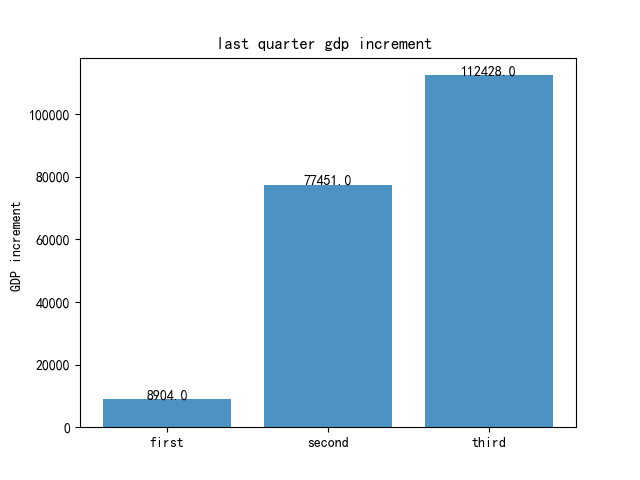

<BarContainer object of 3 artists>

In [4]:
plt.figure()
plt.bar(range(len(a)),a,alpha=0.8)

In [5]:
plt.ylabel("GDP increment ")
plt.title("last quarter gdp increment ")
plt.xticks(range(len(a)),['first','second',"third"])

([<matplotlib.axis.XTick at 0x21e004a0390>,
 <a list of 3 Text xticklabel objects>)

In [6]:
for x,y in enumerate(a.values):
    plt.text(x,y,y,ha='center')

# 水平条形图

<IPython.core.display.Javascript object>


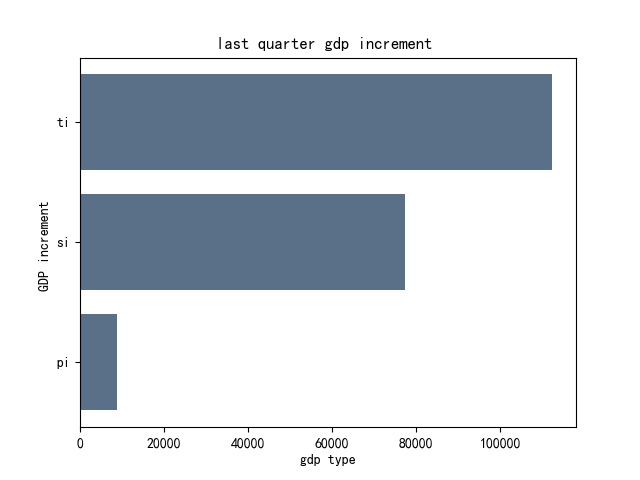

Text(0.5,1,'last quarter gdp increment ')

In [7]:
plt.figure()
plt.barh(a.keys(),a,color='#123456',alpha=0.7)
plt.xlabel('gdp type')
plt.ylabel("GDP increment ")
plt.title("last quarter gdp increment ")
# plt.yticks(range(len(a)),['first','second',"third"])

# 水平交错条形图

In [8]:
a=ts.get_gdp_quarter()
b=a.iloc[:3,[3,5,7]]
b

,pi,si,ti
0,8904.0,77451.0,112428.0
1,65467.6,334622.6,427031.5
2,41229.0,238109.0,313951.0


<IPython.core.display.Javascript object>


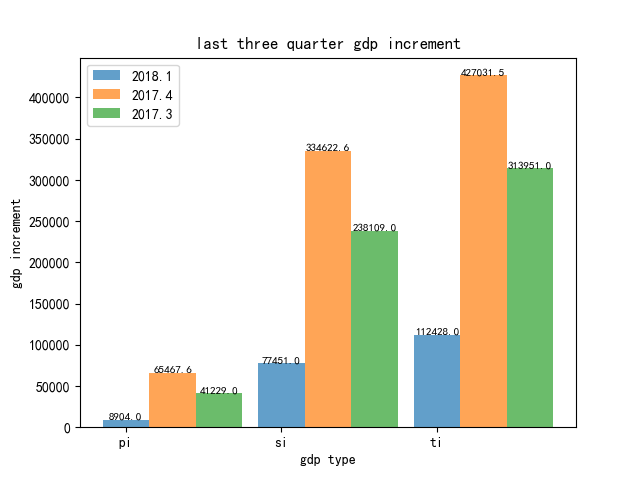

In [9]:
plt.figure()
w=0.3 # 每个位置占得比例
for i in range(len(b)):#0
    plt.bar([j+i*w for j in range(len(b.columns))],b.iloc[i,:],label=a.iloc[i,0],alpha=0.7,width=w)
    for x,y in enumerate(b.iloc[i,:]):
        plt.text(x+i*w,y,y,ha='center',size=8)
plt.title('last three quarter gdp increment')
plt.xlabel('gdp type')
plt.ylabel('gdp increment')
plt.xticks(range(len(b.columns)),b.columns)
plt.legend()

# 垂直堆叠条形图

In [10]:
b=a.iloc[:20,[3,5,7]]
b=b[::-1]
b=b.reset_index(drop=True)
b.head()

,pi,si,ti
0,18011.9,120993.6,134708.4
1,34605.0,187743.6,204270.7
2,55329.1,261956.1,277959.3
3,7540.5,57917.3,73305.9
4,19990.3,126003.1,148018.8


<IPython.core.display.Javascript object>


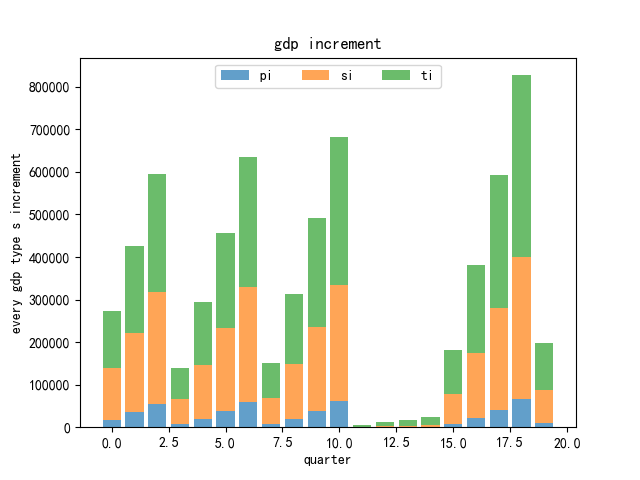

In [11]:
plt.figure()
for i in range(b.shape[1]):
    plt.bar(x=b.index
            ,height=b.iloc[:,i]
            ,bottom=b.cumsum(axis=1).iloc[:,i]-b.iloc[:,i]
            ,alpha=0.7
            ,label=b.columns[i]            
           )
plt.title('gdp increment')
plt.xlabel('quarter')
plt.ylabel('every gdp type s increment')
plt.legend(loc='upper center', ncol=3)

# 饼图

In [12]:
a=ts.get_gdp_contrib()
a.head()

,year,gdp_yoy,pi,si,industry,ti
0,2017,NaN,4.9,36.3,NaN,58.8
1,2016,100.0,4.3,38.2,30.9,57.5
2,2015,100.0,4.6,42.4,35.4,52.9
3,2014,100.0,4.7,47.8,39.2,47.5
4,2013,100.0,4.3,48.5,40.5,47.2


返回值说明：
* year :统计年度
* gdp_yoy :国内生产总值
* pi :第一产业献率(%)
* si :第二产业献率(%)
* industry:其中工业献率(%)
* ti :第三产业献率(%)

In [13]:
b=a.iloc[0,[2,3,5]]
b

pi     4.9
si    36.3
ti    58.8
Name: 0, dtype: float64

<IPython.core.display.Javascript object>


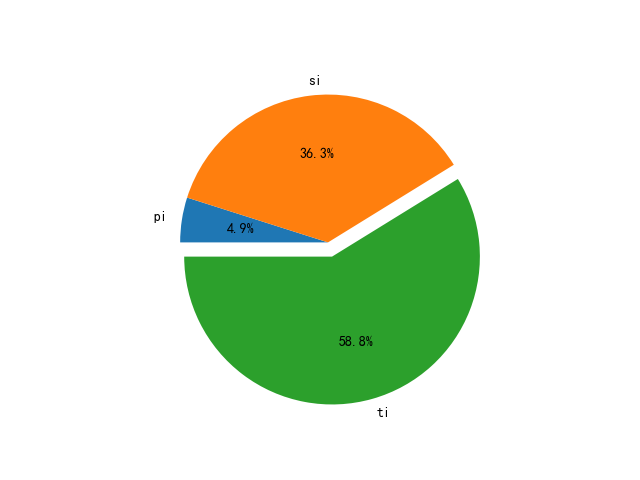

([<matplotlib.patches.Wedge at 0x21e026ac320>,
 [Text(-0.586992,0.668664,'pi'),
  Text(0.365563,1.59175,'si'),
  Text(0.827542,-0.654433,'ti')],
 [Text(-0.092905,0.591998,'4.9%'),
  Text(0.426671,1.0955,'36.3%'),
  Text(0.691066,-0.173419,'58.8%')])

In [14]:
plt.figure()
plt.axes(aspect='equal')
plt.pie(
    x=b  # 指定绘图的数据；
    ,explode=[0,0,0.1]  # 指定饼图某些部分的突出显示，即呈现爆炸式；
    ,labels=b.keys()  # 为饼图添加标签说明，类似于图例说明；
    ,colors=None  # 指定饼图的填充色；
    ,autopct="%.1f%%"  # 自动添加百分比显示，可以采用格式化的方法显示；
    ,pctdistance=.6  # 设置百分比标签与圆心的距离；
    ,shadow=False  # 是否添加饼图的阴影效果；
    ,labeldistance=1.1  # 设置各扇形标签（图例）与圆心的距离；
    ,startangle=180  # 设置饼图的初始摆放角度；
    ,radius=1  # 设置饼图的半径大小；
    ,counterclock=False  # 是否让饼图按逆时针顺序呈现；
    ,wedgeprops=None  # 设置饼图内外边界的属性，如边界线的粗细、颜色等；
    ,textprops=None  # 设置饼图中文本的属性，如字体大小、颜色等；
    ,center=(.5,.5) # 指定饼图的中心点位置，默认为原点
    ,frame=False  # 是否要显示饼图背后的图框，如果设置为True的话，需要同时控制图框x轴、y轴的范围和饼图的中心位置；
)

# 箱线图
箱线图一般用来展现数据的分布（如上下四分位值、中位数等），同时，也可以用箱线图来反映数据的异常情况。

In [15]:
a=ts.get_debtpaying_data(2018,1)
a.head()

[Getting data:]###########################################################

,code,name,currentratio,quickratio,cashratio,icratio,sheqratio,adratio
0,002575,群兴玩具,65.5133,65.5133,5553.45,-370.023,99.0635,0.9365
1,300333,兆日科技,33.759,30.9197,1389.05,-261.792,98.1113,1.8887
2,600868,梅雁吉祥,3.8427,3.8427,209.541,-292.14,97.0657,2.9343
3,000503,国新健康,20.7125,20.7101,1489.77,-779.621,96.9286,3.0714
4,600527,江南高纤,27.2512,21.0109,1750.3,-544.113,96.7908,3.2092


* code,代码
* name,名称
* currentratio,流动比率
* quickratio,速动比率
* cashratio,现金比率
* icratio,利息支付倍数
* sheqratio,股东权益比率
* adratio,股东权益增长率

In [16]:
any(a.sheqratio.isnull())

False

<IPython.core.display.Javascript object>


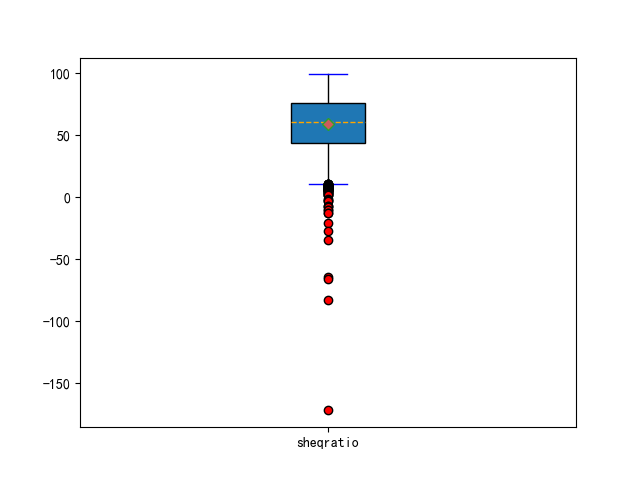

{'whiskers': [<matplotlib.lines.Line2D at 0x21e0679c128>,
 'caps': [<matplotlib.lines.Line2D at 0x21e0679c898>,
 'boxes': [<matplotlib.patches.PathPatch at 0x21e0679bdd8>],
 'medians': [<matplotlib.lines.Line2D at 0x21e0679e748>],
 'fliers': [<matplotlib.lines.Line2D at 0x21e0679e0f0>],
 'means': [<matplotlib.lines.Line2D at 0x21e0679ecc0>]}

In [17]:
plt.figure()
plt.boxplot(
    x=a.sheqratio # 指定要绘制箱线图的数据；
    ,notch=False # 是否是凹口的形式展现箱线图，默认非凹口；
    ,sym=None# 指定异常点的形状，默认为+号显示；
    ,vert=None # 是否需要将箱线图垂直摆放，默认垂直摆放；
    ,whis=1 # 指定上下须与上下四分位的距离，默认为1.5倍的四分位差；
    ,positions=None # 指定箱线图的位置，默认为[0,1,2…]；
    ,widths=None # 指定箱线图的宽度，默认为0.5；
    ,patch_artist=True # 是否填充箱体的颜色,默认不填充
    ,meanline=None # 是否用线的形式表示均值，默认用点来表示；
    ,showmeans=True # 是否显示均值，默认不显示；
    ,showcaps=True # 是否显示箱线图顶端和末端的两条线，默认显示；
    ,showbox=True # 是否显示箱线图的箱体，默认显示；
    ,showfliers=True # 是否显示异常值，默认显示；
    ,labels=[a.sheqratio.name] # 为箱线图添加标签，类似于图例的作用；
    ,boxprops={'color':'black'} # 设置箱体的属性，如边框色，填充色等；
    ,flierprops={'marker':'o','markerfacecolor':'red','color':'red'} # 设置异常值的属性，如异常点的形状、大小、填充色等；
    ,medianprops={'linestyle':'--','color':'orange'} # 设置中位数的属性，如线的类型、粗细等；
    ,meanprops={'marker':'D','markerfacecolor':'indianred'} # 设置均值的属性，如点的大小、颜色等；
    ,capprops={'linestyle':'solid',"color":"blue"} # 设置箱线图顶端和末端线条的属性，如颜色、粗细等；
    ,whiskerprops={} # 设置须的属性，如颜色、粗细、线的类型等；
)

# 多箱线图¶
eg.A股每个地区的股东权益比例箱线图

In [18]:
b=ts.get_stock_basics()
b.head()

,name,industry,area,pe,outstanding,totals,totalAssets,liquidAssets,fixedAssets,reserved,...,bvps,pb,timeToMarket,undp,perundp,rev,profit,gpr,npr,holders
code,,,,,,,,,,,,,,,,,,,,,
603713,N密尔,仓储物流,上海,18.48,0.38,1.52,119281.77,70432.45,10599.10,30671.22,...,6.99,2.32,20180713,35132.05,2.30,0.00,0.00,21.58,8.86,38673.0
002770,科迪乳业,乳制品,河南,38.02,5.82,10.95,290713.81,122758.71,133090.77,631.85,...,1.54,2.11,20150630,52588.55,0.48,21.15,3.64,23.13,8.57,37890.0
002164,宁波东力,电气设备,浙江,17.19,4.09,6.99,1558738.88,1286802.50,61914.88,234646.17,...,4.95,1.01,20070823,37265.26,0.53,4717.76,1143.30,2.50,0.81,35230.0
600152,维科技术,电气设备,浙江,0.00,2.93,4.55,250396.66,156768.27,37668.09,80655.03,...,3.11,1.79,19980609,2162.87,0.05,-24.96,52.65,16.76,-1.97,31381.0
300128,锦富技术,元器件,江苏,304.96,10.66,10.94,405016.03,213833.16,44998.55,66553.55,...,1.87,2.40,20101013,47301.90,0.43,6.82,50.72,10.11,0.59,26415.0


* code,代码
* name,名称
* industry,所属行业
* area,地区
* pe,市盈率
* outstanding,流通股本(亿)
* totals,总股本(亿)
* totalAssets,总资产(万)
* liquidAssets,流动资产
* fixedAssets,固定资产
* reserved,公积金
* reservedPerShare,每股公积金
* esp,每股收益
* bvps,每股净资
* pb,市净率
* timeToMarket,上市日期
* undp,未分利润
* perundp, 每股未分配
* rev,收入同比(%)
* profit,利润同比(%)
* gpr,毛利率(%)
* npr,净利润率(%)
* holders,股东人数

In [19]:
c=pd.merge(a.loc[:,['code','sheqratio']],b.loc[:,['area']],left_on='code',right_index=True,how='inner')
c.head()

,code,sheqratio,area
0,002575,99.0635,广东
1,300333,98.1113,深圳
2,600868,97.0657,广东
3,000503,96.9286,海南
4,600527,96.7908,江苏


In [20]:
sheqratios=[]
labels=c.area.unique()
for i in labels:
    sheqratios.append(c.loc[c.area==i,'sheqratio'])

<IPython.core.display.Javascript object>


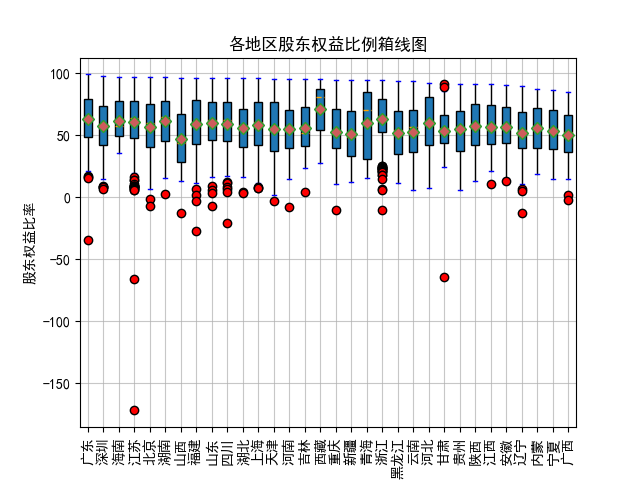

In [21]:
plt.figure()
plt.boxplot(
    x=sheqratios # 指定要绘制箱线图的数据；
    ,notch=False # 是否是凹口的形式展现箱线图，默认非凹口；
    ,sym=None# 指定异常点的形状，默认为+号显示；
    ,vert=None # 是否需要将箱线图垂直摆放，默认垂直摆放；
    ,whis=1 # 指定上下须与上下四分位的距离，默认为1.5倍的四分位差；
    ,positions=None # 指定箱线图的位置，默认为[0,1,2…]；
    ,widths=None # 指定箱线图的宽度，默认为0.5；
    ,patch_artist=True # 是否填充箱体的颜色,默认不填充
    ,meanline=None # 是否用线的形式表示均值，默认用点来表示；
    ,showmeans=True # 是否显示均值，默认不显示；
    ,showcaps=True # 是否显示箱线图顶端和末端的两条线，默认显示；
    ,showbox=True # 是否显示箱线图的箱体，默认显示；
    ,showfliers=True # 是否显示异常值，默认显示；
    ,labels=None # 为箱线图添加标签，类似于图例的作用；
    ,boxprops={'color':'black'} # 设置箱体的属性，如边框色，填充色等；
    ,flierprops={'marker':'o','markerfacecolor':'red','color':'red'} # 设置异常值的属性，如异常点的形状、大小、填充色等；
    ,medianprops={'linestyle':'--','color':'orange'} # 设置中位数的属性，如线的类型、粗细等；
    ,meanprops={'marker':'D','markerfacecolor':'indianred'} # 设置均值的属性，如点的大小、颜色等；
    ,capprops={'linestyle':'solid',"color":"blue"} # 设置箱线图顶端和末端线条的属性，如颜色、粗细等；
    ,whiskerprops={} # 设置须的属性，如颜色、粗细、线的类型等；
)
plt.xticks(range(1,len(labels)+1),labels.tolist(),rotation=90)
plt.ylabel('股东权益比率')
plt.xlabel('地区')
plt.title('各地区股东权益比例箱线图')
plt.grid(alpha=0.7)

# 直方图
eg.以万科A的股票价格做直方图

In [22]:
a=ts.get_k_data('000002')
a.head()

,date,open,close,high,low,volume,code
0,2015-05-14,13.380,13.101,14.008,13.047,7786253.0,000002
1,2015-05-15,13.209,12.715,13.272,12.563,3391408.0,000002
2,2015-05-18,12.563,12.428,12.563,12.302,2365271.0,000002
3,2015-05-19,12.464,12.715,12.805,12.392,2581797.0,000002
4,2015-05-20,12.733,12.616,12.913,12.554,3055941.0,000002


<IPython.core.display.Javascript object>


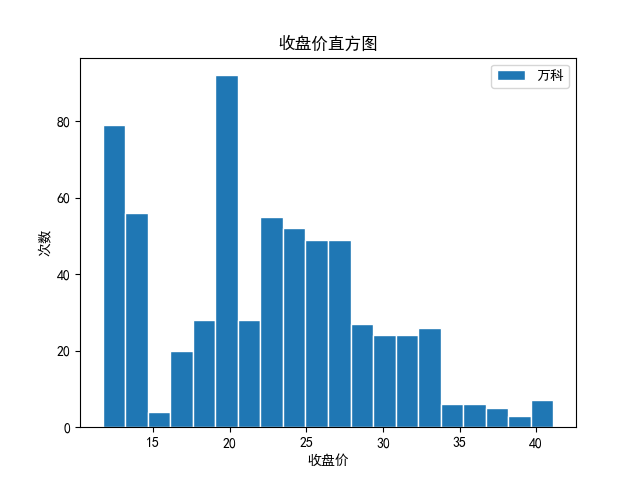

In [23]:
plt.figure()
plt.hist(
    x=a.close ,# 指定要绘制直方图的数据；
    bins=20 ,# 指定直方图条形的个数；
    range=None ,# 指定直方图数据的上下界，默认包含绘图数据的最大值和最小值；
    density=None ,# 是否将直方图的频数转换成频率；
    weights=None ,# 该参数可为每一个数据点设置权重；
    cumulative=None ,# 是否需要计算累计频数或频率；
    bottom=None ,# 可以为直方图的每个条形添加基准线，默认为0；
    histtype="bar" ,# 指定直方图的类型，默认为bar，除此还有’barstacked’, ‘step’,  ‘stepfilled’；
    align='mid' ,# 设置条形边界值的对其方式，默认为mid，除此还有’left’和’right’；
    orientation='vertical' ,# 设置直方图的摆放方向，默认为垂直方向；{'horizontal', 'vertical'}, optional
    rwidth=None ,# 设置直方图条形宽度的百分比；
    log=None ,# 是否需要对绘图数据进行log变换；
    color=None ,# 设置直方图的填充色；
    label="万科" ,# 设置直方图的标签，可通过legend展示其图例；
    stacked=None ,# 当有多个数据时，是否需要将直方图呈堆叠摆放，默认水平摆放；
    edgecolor='w', # 边界色
#     facecolor='r', #填充色
)
plt.xlabel('收盘价')
plt.ylabel('次数')
plt.title('收盘价直方图')
plt.legend()

# 多数据直方图

<IPython.core.display.Javascript object>


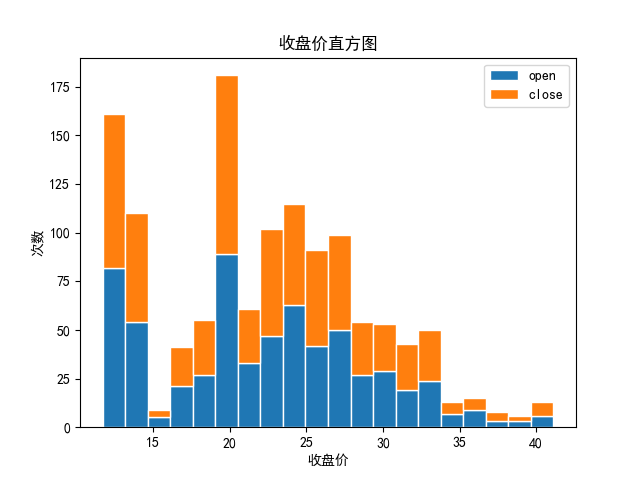

In [24]:
plt.figure()
plt.hist(
    x=[a.open,a.close] ,# 指定要绘制直方图的数据；
    bins=20 ,# 指定直方图条形的个数；
    range=None ,# 指定直方图数据的上下界，默认包含绘图数据的最大值和最小值；
    density=None ,# 是否将直方图的频数转换成频率；
    weights=None ,# 该参数可为每一个数据点设置权重；
    cumulative=None ,# 是否需要计算累计频数或频率；
    bottom=None ,# 可以为直方图的每个条形添加基准线，默认为0；
    histtype="barstacked" ,# 指定直方图的类型，默认为bar，除此还有’barstacked’, ‘step’,  ‘stepfilled’；
    align='mid' ,# 设置条形边界值的对其方式，默认为mid，除此还有’left’和’right’；
    orientation='vertical' ,# 设置直方图的摆放方向，默认为垂直方向；{'horizontal', 'vertical'}, optional
    rwidth=None ,# 设置直方图条形宽度的百分比；
    log=None ,# 是否需要对绘图数据进行log变换；
    color=None ,# 设置直方图的填充色；
    label=['open','close'] ,# 设置直方图的标签，可通过legend展示其图例；
    stacked=None ,# 当有多个数据时，是否需要将直方图呈堆叠摆放，默认水平摆放；
    edgecolor='w', # 边界色
#     facecolor='r', #填充色
)
plt.xlabel('收盘价')
plt.ylabel('次数')
plt.title('收盘价直方图')
plt.legend()

# 折线图
eg.股价折线图

In [25]:
a=ts.get_k_data('000002',start='2018-06-06')
a.head()

,date,open,close,high,low,volume,code
102,2018-06-06,27.30,26.99,27.54,26.85,508162.0,000002
103,2018-06-07,27.07,27.39,27.64,26.95,597535.0,000002
104,2018-06-08,27.10,26.71,27.18,26.55,388545.0,000002
105,2018-06-11,26.74,27.31,27.73,26.68,526436.0,000002
106,2018-06-12,27.57,27.71,27.83,27.23,498372.0,000002


<IPython.core.display.Javascript object>


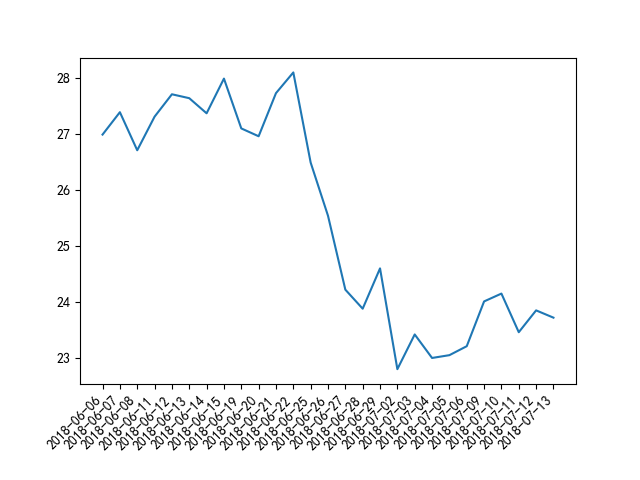

In [26]:
fig=plt.figure()
plt.plot('date','close',data=a)
fig.autofmt_xdate(rotation = 45)

<IPython.core.display.Javascript object>


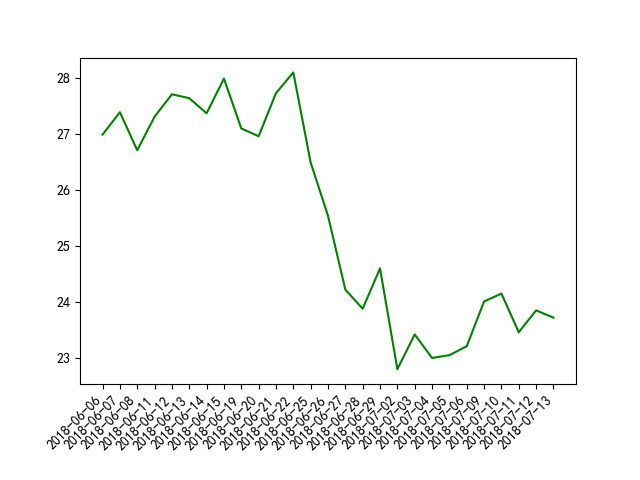

In [27]:
fig=plt.figure()
plt.plot(a.date,a.close,'green')
fig.autofmt_xdate(rotation = 45)

格式字符串由颜色，标记和线条的部分组成：
```python
fmt = '[color][marker][line]'
```

<IPython.core.display.Javascript object>


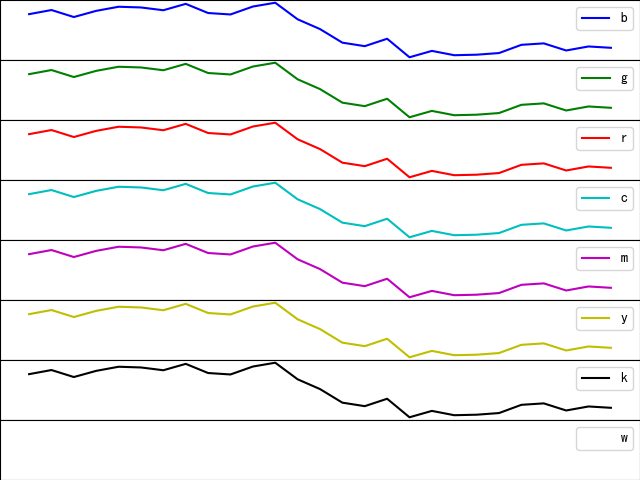

In [28]:
# 颜色
colors=['b',# 蓝色
'g',# 绿色
'r',# 红
'c',# 青色
'm',# 品红
'y',# 黄色
'k',# 黑色
'w',# 白色
]
fig,axes=plt.subplots(len(colors),1)
for i in range(len(colors)):
    axes[i].plot(a.date,a.close,colors[i],label=colors[i])
    axes[i].legend()
fig.autofmt_xdate(rotation = 45)
plt.subplots_adjust(wspace=0,hspace=0,left=0,right=1,top=1,bottom=0)

<IPython.core.display.Javascript object>


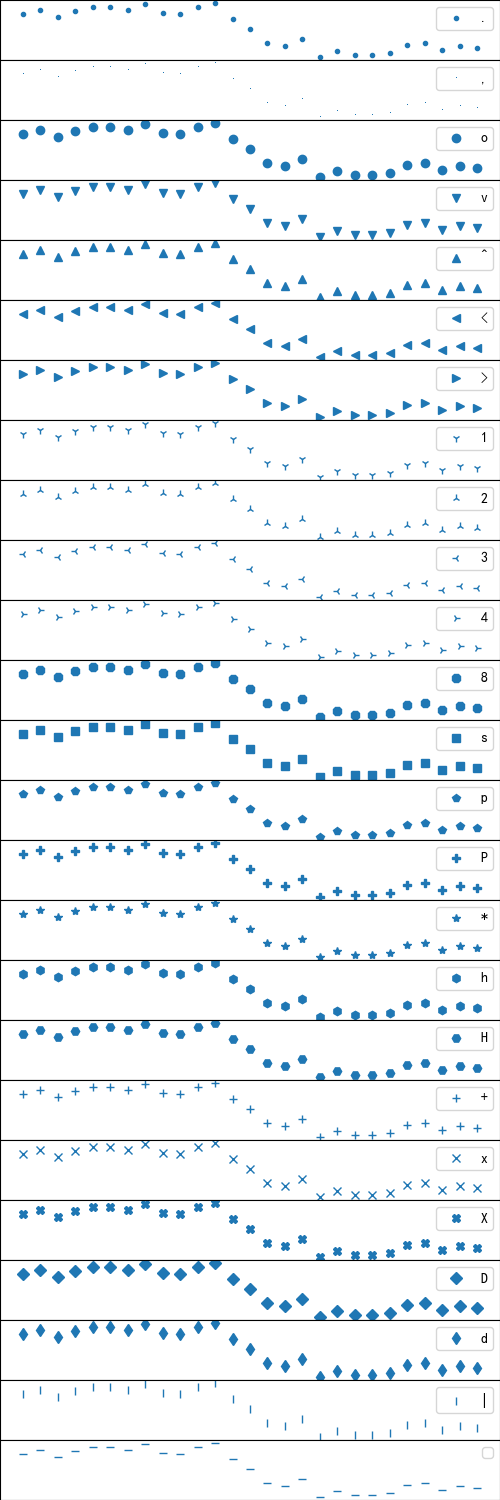

No handles with labels found to put in legend.


In [29]:
markers=[
".",# point
",",# pixel
"o",# circle
"v",# triangle_down
"^",# triangle_up
"<",# triangle_left
">",# triangle_right
"1",# tri_down
"2",# tri_up
"3",# tri_left
"4",# tri_right
"8",# octagon
"s",# square
"p",# pentagon
"P",# plus (filled)
"*",# star
"h",# hexagon1
"H",# hexagon2
"+",# plus
"x",# x
"X",# x (filled)
"D",# diamond
"d",# thin_diamond
"|",# vline
"_",# hline
]
fig,axes=plt.subplots(len(markers),1,figsize=(5,15))
for i in range(len(markers)):
    axes[i].plot(a.date,a.close,markers[i],label=markers[i])
    axes[i].legend()
fig.autofmt_xdate(rotation = 45)
plt.subplots_adjust(wspace=0,hspace=0,left=0,right=1,top=1,bottom=0)

<IPython.core.display.Javascript object>


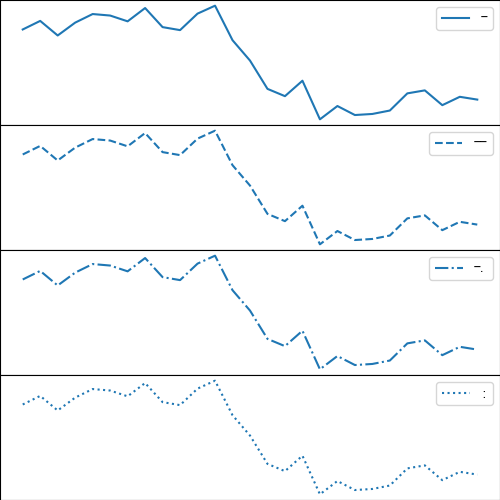

In [30]:
lines=[
'-'	,#实线风格
'--',#	虚线样式
'-.',#	点划线样式
':',#	虚线样式
]
fig,axes=plt.subplots(len(lines),1,figsize=(5,5))
for i in range(len(lines)):
    axes[i].plot(a.date,a.close,lines[i],label=lines[i])
    axes[i].legend()
fig.autofmt_xdate(rotation = 45)
plt.subplots_adjust(wspace=0,hspace=0,left=0,right=1,top=1,bottom=0)

# 多元折线图

<IPython.core.display.Javascript object>


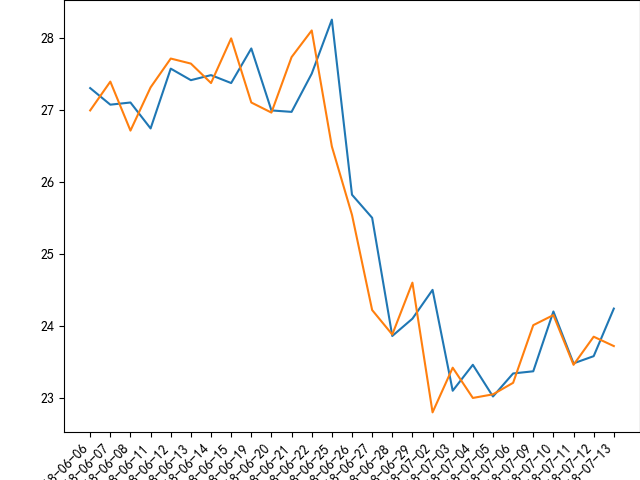

In [31]:
fig=plt.figure()
plt.plot(a.date,a.loc[:,['open','close']])
fig.autofmt_xdate(rotation = 45)
plt.subplots_adjust(wspace=0,hspace=0,left=.1,right=1,top=1,bottom=.1)

<IPython.core.display.Javascript object>


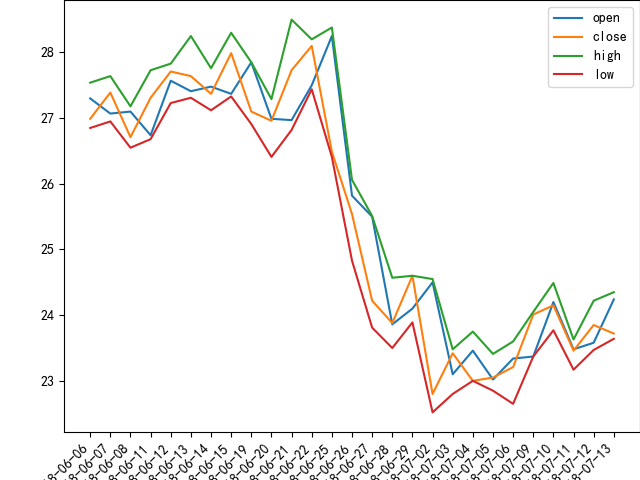

In [32]:
fig=plt.figure()
for i in a.columns[1:5]:
    plt.plot(a.date,a[i],label=i)
fig.autofmt_xdate(rotation = 45)
plt.subplots_adjust(wspace=0,hspace=0,left=.1,right=1,top=1,bottom=.1)
plt.legend()

# 散点图
eg.上市公司总股本和市盈率的关系

In [34]:
a=ts.get_stock_basics()
a=a.loc[:,['pe','totals']]
a.head()

,pe,totals
code,,
603713,18.48,1.52
002770,38.02,10.95
002164,17.19,6.99
600152,0.00,4.55
300128,304.96,10.94


<IPython.core.display.Javascript object>


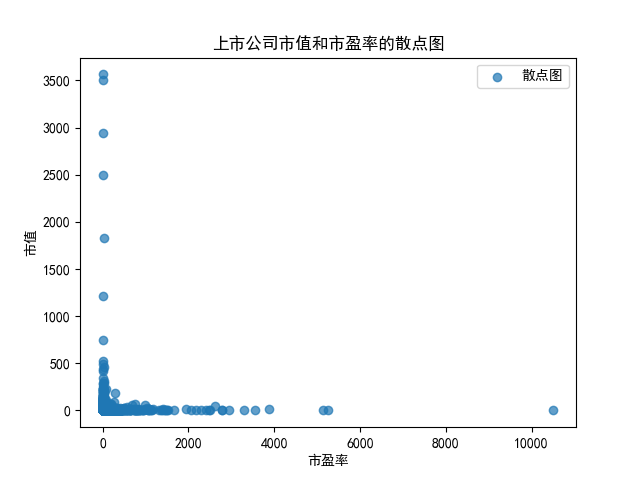

In [35]:
plt.figure()
plt.scatter(
    x=a.pe,# 指定散点图的x轴数据；
    y=a.totals,# 指定散点图的y轴数据；
    s=None,# 指定散点图点的大小，默认为20，通过传入新的变量，实现气泡图的绘制；
    c=None,# 指定散点图点的颜色，默认为蓝色；
    marker=None,# 指定散点图点的形状，默认为圆形；
    cmap=None,# 指定色图，只有当c参数是一个浮点型的数组的时候才起作用；
    norm=None,# 设置数据亮度，标准化到0~1之间，使用该参数仍需要c为浮点型的数组；
    vmin=None,# 亮度设置，与norm类似，如果使用了norm则该参数无效；
    vmax=None,
    alpha=0.7,# 设置散点的透明度；
    linewidths=None,# 设置散点边界线的宽度；
    edgecolors=None,# 设置散点边界线的颜色；
    label='散点图'
)
plt.title('上市公司市值和市盈率的散点图')
plt.xlabel('市盈率')
plt.ylabel('市值')
plt.legend()

# 分组散点图

In [36]:
a=ts.get_stock_basics()
a.head()

,name,industry,area,pe,outstanding,totals,totalAssets,liquidAssets,fixedAssets,reserved,...,bvps,pb,timeToMarket,undp,perundp,rev,profit,gpr,npr,holders
code,,,,,,,,,,,,,,,,,,,,,
603713,N密尔,仓储物流,上海,18.48,0.38,1.52,119281.77,70432.45,10599.10,30671.22,...,6.99,2.32,20180713,35132.05,2.30,0.00,0.00,21.58,8.86,38673.0
002770,科迪乳业,乳制品,河南,38.02,5.82,10.95,290713.81,122758.71,133090.77,631.85,...,1.54,2.11,20150630,52588.55,0.48,21.15,3.64,23.13,8.57,37890.0
002164,宁波东力,电气设备,浙江,17.19,4.09,6.99,1558738.88,1286802.50,61914.88,234646.17,...,4.95,1.01,20070823,37265.26,0.53,4717.76,1143.30,2.50,0.81,35230.0
600152,维科技术,电气设备,浙江,0.00,2.93,4.55,250396.66,156768.27,37668.09,80655.03,...,3.11,1.79,19980609,2162.87,0.05,-24.96,52.65,16.76,-1.97,31381.0
300128,锦富技术,元器件,江苏,304.96,10.66,10.94,405016.03,213833.16,44998.55,66553.55,...,1.87,2.40,20101013,47301.90,0.43,6.82,50.72,10.11,0.59,26415.0


<IPython.core.display.Javascript object>


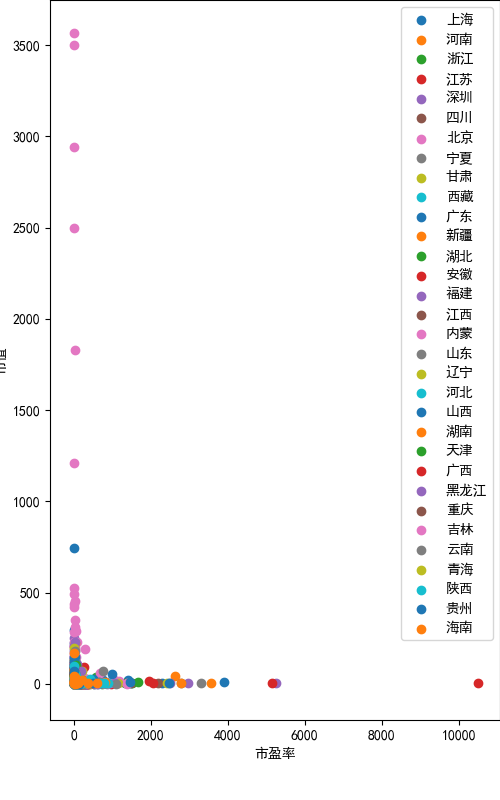

In [37]:
plt.figure(figsize=(5,8))
areas=a.area.unique()
for i in areas:
    plt.scatter(
        x=a.loc[a.area==i,:].pe,# 指定散点图的x轴数据；
        y=a.loc[a.area==i,:].totals,# 指定散点图的y轴数据；
        s=None,# 指定散点图点的大小，默认为20，通过传入新的变量，实现气泡图的绘制；
        c=None,# 指定散点图点的颜色，默认为蓝色；
        marker=None,# 指定散点图点的形状，默认为圆形；
        cmap=None,# 指定色图，只有当c参数是一个浮点型的数组的时候才起作用；
        norm=None,# 设置数据亮度，标准化到0~1之间，使用该参数仍需要c为浮点型的数组；
        vmin=None,# 亮度设置，与norm类似，如果使用了norm则该参数无效；
        vmax=None,
        alpha=None,# 设置散点的透明度；
        linewidths=None,# 设置散点边界线的宽度；
        edgecolors=None,# 设置散点边界线的颜色；
        label=i
    )
plt.title('上市公司市值和市盈率的散点图')
plt.xlabel('市盈率')
plt.ylabel('市值')
plt.legend()
plt.subplots_adjust(wspace=0,hspace=0,left=.1,right=1,top=1,bottom=.1)

# 气泡图的绘制

In [38]:
a=pd.DataFrame(pd.np.random.randn(50,3),columns=list('xyz'))
a.head()

,x,y,z
0,0.778638,0.151597,-0.284703
1,1.230178,0.681275,0.296904
2,-0.536770,0.364679,1.396961
3,-2.173604,0.319385,-0.429315
4,-1.062511,2.123887,-0.287754


<IPython.core.display.Javascript object>


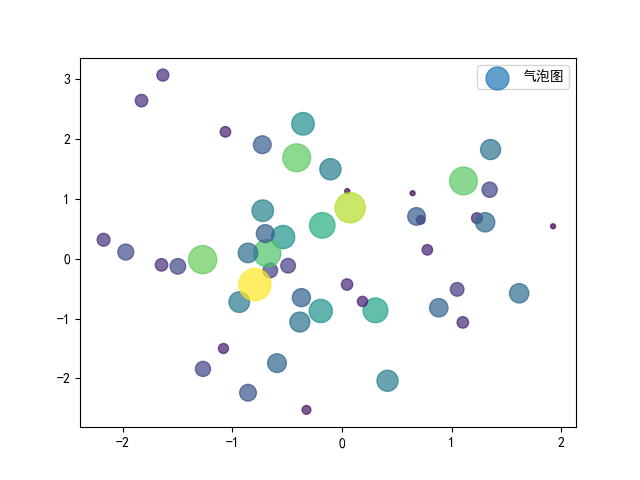

In [48]:
plt.figure()
plt.scatter(
    x=a.x,# 指定散点图的x轴数据；
    y=a.y,# 指定散点图的y轴数据；
    s=abs(a.z)*200,# 指定散点图点的大小，默认为20，通过传入新的变量，实现气泡图的绘制；
    c=abs(a.z),# 指定散点图点的颜色，默认为蓝色；
    marker=None,# 指定散点图点的形状，默认为圆形；
    cmap=None,# 指定色图，只有当c参数是一个浮点型的数组的时候才起作用；
    norm=None,# 设置数据亮度，标准化到0~1之间，使用该参数仍需要c为浮点型的数组；
    vmin=None,# 亮度设置，与norm类似，如果使用了norm则该参数无效；
    vmax=None,
    alpha=0.7,# 设置散点的透明度；
    linewidths=None,# 设置散点边界线的宽度；
    edgecolors=None,# 设置散点边界线的颜色；
    label='气泡图'
)
plt.legend()

# K线图

In [49]:
a=ts.get_k_data('000001',start='2018-05-01')
a.head()

,date,open,close,high,low,volume,code
77,2018-05-02,10.796,10.707,10.855,10.628,1190523.0,000001
78,2018-05-03,10.687,10.579,10.707,10.402,1281355.0,000001
79,2018-05-04,10.559,10.510,10.658,10.491,710509.0,000001
80,2018-05-07,10.530,10.638,10.658,10.471,974309.0,000001
81,2018-05-08,10.658,10.835,10.973,10.628,1373305.0,000001


In [52]:
import mpl_finance as mfl
from datetime import datetime
from matplotlib.pylab import date2num

In [53]:
a.date=a.date.apply(lambda x:date2num(datetime.strptime(x,'%Y-%m-%d')))
a.head()

,date,open,close,high,low,volume,code
77,736816.0,10.796,10.707,10.855,10.628,1190523.0,000001
78,736817.0,10.687,10.579,10.707,10.402,1281355.0,000001
79,736818.0,10.559,10.510,10.658,10.491,710509.0,000001
80,736821.0,10.530,10.638,10.658,10.471,974309.0,000001
81,736822.0,10.658,10.835,10.973,10.628,1373305.0,000001


<IPython.core.display.Javascript object>


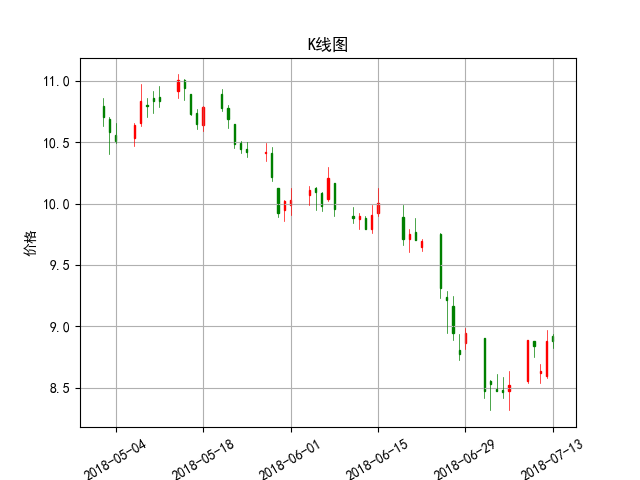

In [55]:
fig,ax=plt.subplots()
mfl.candlestick_ochl(ax,a.values,colordown='g',colorup='r')
plt.grid()
plt.xticks(rotation=30)
plt.title('K线图')
plt.xlabel('日期')
plt.ylabel('价格')
ax.xaxis_date()